In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


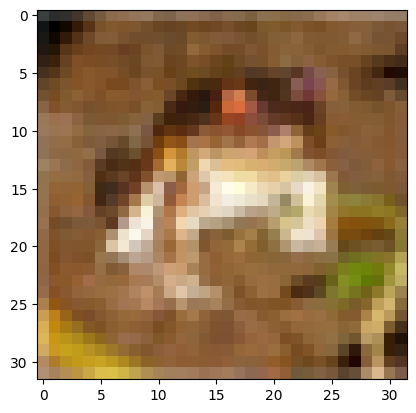

In [ ]:
mnist = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0])

In [ ]:
x_train,x_test = x_train/255.0, x_test/255.0

In [ ]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [ ]:
print('X_train shape:', x_train.shape)

X_train shape: (50000, 32, 32, 3)


In [ ]:
#numero de classes

k = len(set(y_train))
print('Numero de classes:', k)

Numero de classes: 10


In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal', input_shape=(32,32,3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# **Modelo**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(x_train[0].shape),
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3,3), strides=2, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), strides=2, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), strides=2, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(k, activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=60)

Epoch 1/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7884 - loss: 0.6088 - val_accuracy: 0.7593 - val_loss: 0.7078
Epoch 2/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7892 - loss: 0.5998 - val_accuracy: 0.7768 - val_loss: 0.6645
Epoch 3/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7884 - loss: 0.6060 - val_accuracy: 0.7471 - val_loss: 0.7654
Epoch 4/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7942 - loss: 0.5901 - val_accuracy: 0.7563 - val_loss: 0.7266
Epoch 5/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7944 - loss: 0.5899 - val_accuracy: 0.7591 - val_loss: 0.7083
Epoch 6/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7922 - loss: 0.5960 - val_accuracy: 0.7620 - val_loss: 0.6938
Epoch 7/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7979 - loss: 0.5788 - val_accuracy: 0.7519 - val_loss: 0.7197
Epoch 8/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7978 - loss: 0

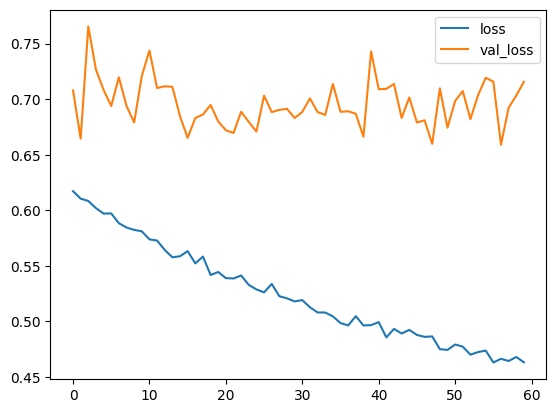

In [ ]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

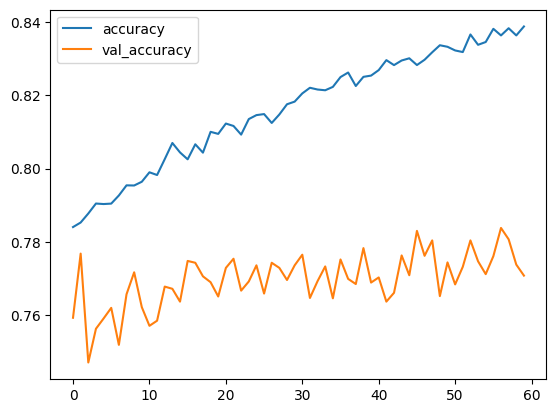

In [ ]:
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# **Predictions**

In [ ]:
import numpy as np

P = model.predict(x_test)
P = np.round(P).flatten()
print(P)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0. 0. 0. ... 1. 0. 0.]


In [ ]:
print('Acurácia: ', model.evaluate(x_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7680 - loss: 0.7070
Acurácia:  [0.7157067060470581, 0.770799994468689]


# **Matriz de confusão**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix, without normalization
[[817  34  27  19   8   5  10  13  36  31]
 [  5 925   0   3   1   1   9   6  12  38]
 [ 58   8 633  41  65  43  98  40   4  10]
 [ 18  19  32 553  53 135 125  34   9  22]
 [ 15   6  34  37 702  25 107  65   3   6]
 [  9  10  13  98  48 694  62  53   4   9]
 [  3   6  10  29  12   6 924   5   2   3]
 [ 10   5  12  18  34  26  17 859   2  17]
 [ 58  54  12  13   6   2  10   3 811  31]
 [ 28 127   3   5   2   6  15  14  10 790]]


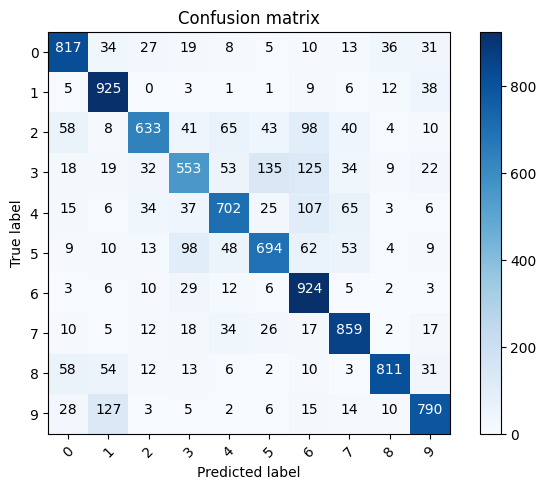

In [ ]:
#Plot confusion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix'):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: dog Predicted: cat')

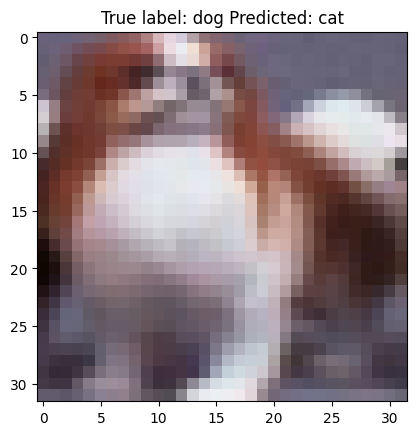

In [ ]:
#Show misdisclassified samples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))